In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

NUM_EVENTS = 500
P = 0.5
GAMMA = 0.5

#### Barabasi-Albert
- P=1, gamma=1, 10 Networks and 500 events
- fit function: (alpha * ln(t/t_v) +1)^beta

=> we want 
- alpha=(1-gamma)(2-p)/u 
- beta=1/(1-gamma)

In [32]:
# Theoretichal vertex trajectory for stretched exponential distribution
def theoretical_func(x, a, b, start_x):
    return  pow((a*(np.log(x/start_x)) + 1), b)

# Method to fit the theoretical trajectory to the given average trajectory 
def fit_trajectory(xdata, ydata):
    
    popt, pcov = curve_fit(lambda x, a, b: theoretical_func(x, a, b, xdata[0]), xdata, ydata, maxfev=5000, bounds=([0, 1], [np.inf, np.inf]))
    alpha = popt[0]
    beta = popt[1]

    return alpha, beta 


In [33]:
df = pd.read_csv("Chung-Li_p05_b05.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,start_event
0,0,1,2,3,3,3,3,3,3,4,...,37,37,38,38,38,38,38,38,38,1
1,0,1,1,1,1,2,2,2,3,3,...,35,35,35,35,35,35,35,35,35,1
2,0,0,1,1,2,2,2,3,4,4,...,19,19,19,19,19,19,19,20,20,2
3,0,0,0,1,2,3,4,4,4,4,...,24,24,24,24,24,24,24,24,24,3
4,0,0,0,0,0,0,1,1,1,1,...,30,30,30,30,30,30,30,30,30,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25230,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,491
25231,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,492
25232,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,493
25233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,496


In [34]:
# retrieve average trajectories by starting year
avg_x = []
avg_y = []
for curr_e in range(2, NUM_EVENTS):
    sub_df = df[df["start_event"]==curr_e]
    
    x, y = [],[]
    for e in range(curr_e, NUM_EVENTS):
        if(len(sub_df)!=0):
            x.append(e)
            y.append(sub_df[str(e)].mean())
        else:
            x.append(e)
            y.append(0)
    
    avg_x.append(x)
    avg_y.append(y)

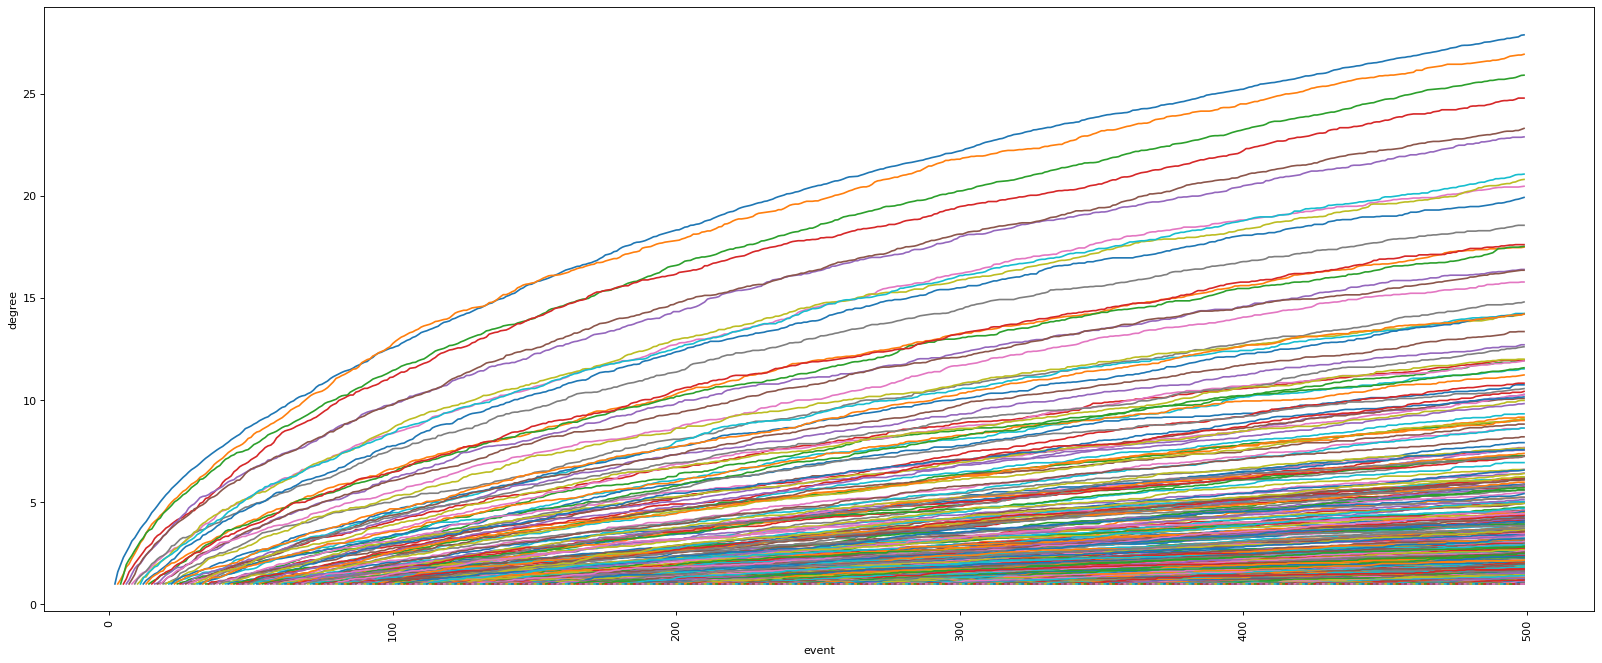

In [35]:
## Plot average trajectories 
plt.figure(figsize=(25, 10), dpi=80)
plt.xlabel("event")
plt.ylabel("degree")
plt.xticks(rotation='vertical')

for x,y in zip(avg_x, avg_y):
    plt.plot(x,y)

plt.show()
    

In [41]:
def get_u(df):
    sum_deg = 0
    for i in df[str(NUM_EVENTS-1)]:
        sum_deg += pow(i, GAMMA)
    
    return sum_deg/500


86.82043904701443

In [47]:
u = get_u(df)
expected_alpha = ((1-GAMMA)*(2-P))/u
expected_beta =  1/(1-GAMMA)
print("u = ", u)

u =  86.82043904701443


In [48]:
alphas = []
betas = []
diffs_alpha= []
diffs_beta= []



#print("-- event -- \t-- alpha -- \t -- alpha-1/2 --")
for curr_e in range(len(avg_x)):
    x = avg_x[curr_e]
    y = avg_y[curr_e]
    
    try:
        alpha, beta = fit_trajectory(x, y)
        
    except:
        print(x,y)
        
    diff_alpha = "%.4f" % abs(float(alpha) - expected_alpha)
    diff_beta = "%.4f" % abs(float(beta) - expected_beta)
        
    alpha = "%.4f" % alpha
    beta = "%.4f" % beta
    
    alphas.append(float(alpha))
    betas.append(float(beta))

    diffs_alpha.append(float(diff_alpha))
    diffs_beta.append(float(diff_beta))
    #print(curr_e, "\t\t", alpha, "\t\t", diff )



results = pd.DataFrame({"event": range(2, NUM_EVENTS), "alpha": alphas, "beta": betas, "diff_alpha": diffs_alpha, "diff_beta": diffs_beta})
results

/home/rorschach/anaconda3/envs/intership/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


,event,alpha,beta,diff_alpha,diff_beta
0,2,0.1493,5.5439,0.1407,3.5439
1,3,0.2695,3.8070,0.2609,1.8070
2,4,0.2699,3.8954,0.2613,1.8954
3,5,0.3819,3.1566,0.3733,1.1566
4,6,0.3336,3.4507,0.3250,1.4507
...,...,...,...,...,...
493,495,0.0071,1.0071,0.0015,0.9929
494,496,0.0071,1.0071,0.0015,0.9929
495,497,0.0141,1.0141,0.0055,0.9859
496,498,0.0279,1.0279,0.0192,0.9721


In [52]:

print(" -- alpha must be", "%.4f" % expected_alpha, "--")
print(" -- beta must be", "%.4f" % expected_beta, "--\n")

# how many alpha differ from the  expectation of the given tolerance
print("-- #alphas such that alpha-((1-u)*(2-P))/u < tolerance -- ")
tolerance = 0.0
while tolerance <= 1:
    print("tolerance =", "%.1f"%tolerance, "-> #aphas =", len(results[results["diff_alpha"] <= tolerance]))
    tolerance += 0.1
    
print()

print("-- #betas such that beta-((1-GAMMA) < tolerance -- ")
tolerance = 0.0
while tolerance <= 1:
    print("tolerance <=", "%.1f"%tolerance, "-> #betas =", len(results[results["diff_beta"] <= tolerance]))
    tolerance += 0.1

 -- alpha must be 0.0086 --
 -- beta must be 2.0000 --

-- #alphas such that alpha-((1-u)*(2-P))/u < tolerance -- 
tolerance = 0.0 -> #aphas = 0
tolerance = 0.1 -> #aphas = 197
tolerance = 0.2 -> #aphas = 237
tolerance = 0.3 -> #aphas = 270
tolerance = 0.4 -> #aphas = 305
tolerance = 0.5 -> #aphas = 330
tolerance = 0.6 -> #aphas = 358
tolerance = 0.7 -> #aphas = 378
tolerance = 0.8 -> #aphas = 391
tolerance = 0.9 -> #aphas = 405
tolerance = 1.0 -> #aphas = 419

-- #betas such that beta-((1-GAMMA) < tolerance -- 
tolerance <= 0.0 -> #betas = 1
tolerance <= 0.1 -> #betas = 7
tolerance <= 0.2 -> #betas = 18
tolerance <= 0.3 -> #betas = 31
tolerance <= 0.4 -> #betas = 41
tolerance <= 0.5 -> #betas = 52
tolerance <= 0.6 -> #betas = 68
tolerance <= 0.7 -> #betas = 76
tolerance <= 0.8 -> #betas = 85
tolerance <= 0.9 -> #betas = 99
tolerance <= 1.0 -> #betas = 121


In [50]:
results.sort_values(by="diff_alpha",  ascending=True)

,event,alpha,beta,diff_alpha,diff_beta
494,496,0.0071,1.0071,0.0015,0.9929
493,495,0.0071,1.0071,0.0015,0.9929
177,179,0.0131,74.5205,0.0045,72.5205
86,88,0.0037,242.8071,0.0050,240.8071
492,494,0.0036,1.0036,0.0051,0.9964
...,...,...,...,...,...
333,335,1.9075,1.0000,1.8988,1.0000
458,460,1.9120,1.0000,1.9033,1.0000
329,331,1.9325,1.0000,1.9239,1.0000
485,487,2.6326,1.0000,2.6240,1.0000


In [51]:
results.sort_values(by="diff_beta",  ascending=True)

,event,alpha,beta,diff_alpha,diff_beta
497,499,1.0000,2.0000,0.9914,0.0000
364,366,0.7274,2.0196,0.7187,0.0196
174,176,0.6754,1.9796,0.6667,0.0204
157,159,0.7935,2.0323,0.7849,0.0323
139,141,0.6942,2.0359,0.6855,0.0359
...,...,...,...,...,...
384,386,0.0001,9490.2614,0.0085,9488.2614
270,272,0.0001,9555.1907,0.0085,9553.1907
432,434,0.0002,10129.1124,0.0085,10127.1124
451,453,0.0002,10302.3482,0.0085,10300.3482
